In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
xtrain,xtest,ytrain,ytest = train_test_split(data.data,data.target,test_size=0.2,random_state=22)

In [7]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [18]:
def dataInfo(x):
    namelist = ['setose','versicolor','virginaica']
    
    for i,k in zip(data.feature_names,xtrain[x]):
        print(i,k)
    if ytrain[x] == 0:
        print(namelist[0])
    if ytrain[x] == 1:
        print(namelist[1])
    if ytrain[x] == 2:
        print(namelist[2])

In [24]:
dataInfo(16)

sepal length (cm) 5.7
sepal width (cm) 2.5
petal length (cm) 5.0
petal width (cm) 2.0
virginaica


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pydotplus
from IPython.display import Image 

In [27]:
tree = DecisionTreeClassifier()
param = {'criterion':('gini','entropy'),'max_depth':[3,4,5,6]}
gscv = GridSearchCV(estimator=tree,param_grid=param,cv=6)

In [28]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=6, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                   

In [30]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [31]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [32]:
tree.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
tree.score(xtest,ytest)
pred = tree.predict(xtest)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix,r2_score
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.77      1.00      0.87        10
           2       1.00      0.79      0.88        14

    accuracy                           0.90        30
   macro avg       0.92      0.93      0.92        30
weighted avg       0.92      0.90      0.90        30



In [45]:
import seaborn as sns
print(confusion_matrix(ytest,pred))

[[ 6  0  0]
 [ 0 10  0]
 [ 0  3 11]]


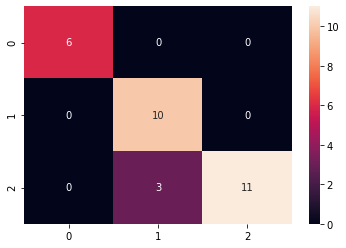

In [46]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True)

In [48]:
tree.predict(xtest)

array([0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 1])

In [66]:
xtrain[0]

array([4.8, 3.1, 1.6, 0.2])

In [68]:
r2_score(ytest,pred)

0.8320895522388059

In [77]:
from sklearn.tree import export_graphviz

In [79]:
dot_data = export_graphviz(tree, out_file=None, 
                                feature_names=data.feature_names,  
                                class_names=data.target_names)

In [81]:
graph = pydotplus.graph_from_dot_data(dot_data)

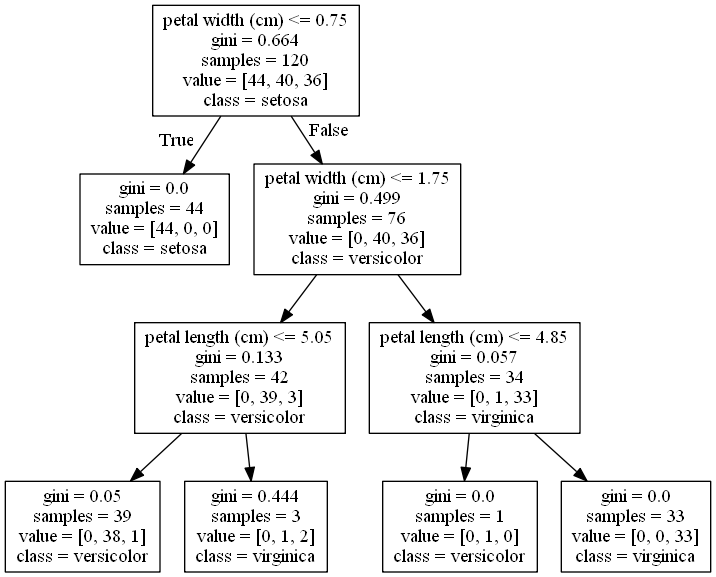

In [91]:
Image(graph.create_png())